<a href="https://colab.research.google.com/github/ahmer-talal/Colab-Files/blob/main/Zepop_ResearchPaperCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZePoP: A Distributed Leader Election Protocol using the Delay-based Closeness Centrality for Peer-to-Peer Applications

In [1]:
import random
import heapq
import math

# ---------------------------------------------------------
# 1) GRAPH CLASS WITH DIJKSTRA (SHORTES-PATH DELAY)
# ---------------------------------------------------------

class Graph:
    def __init__(self, n):
        """
        n = total number of nodes
        adj = adjacency list: {node: {neighbor: delay}}
        """
        self.n = n
        self.adj = {i: {} for i in range(n)}

    def add_edge(self, u, v, delay):
        """
        Undirected edge with delay (time cost)
        """
        self.adj[u][v] = delay
        self.adj[v][u] = delay

    def dijkstra(self, src):
        """
        Returns an array of shortest delays from src to all nodes
        """
        dist = [math.inf] * self.n
        dist[src] = 0

        pq = [(0, src)]  # (distance, node)

        while pq:
            d, u = heapq.heappop(pq)

            if d != dist[u]:
                continue

            for v, w in self.adj[u].items():
                nd = d + w
                if nd < dist[v]:
                    dist[v] = nd
                    heapq.heappush(pq, (nd, v))

        return dist


# ---------------------------------------------------------
# 2) RANDOM GRAPH GENERATION (Assignment-Level)
# ---------------------------------------------------------

def generate_random_graph(n, density=0.4):
    """
    n = number of nodes
    density = percentage of possible edges (0 to 1)

    This function creates a random weighted graph.
    """
    g = Graph(n)

    print(f"\nGenerating random graph with {n} nodes...")

    for i in range(n):
        for j in range(i + 1, n):

            # random chance to include an edge
            if random.random() < density:
                delay = random.randint(1, 20)  # random edge weight
                g.add_edge(i, j, delay)

    print("Graph generation complete.\n")
    return g


# ---------------------------------------------------------
# 3) LEADER SELECTION USING CLOSENESS CENTRALITY
# ---------------------------------------------------------

def elect_leader_by_closeness(graph):
    """
    Closest-delay node is selected as leader.
    """
    closeness = {}

    print("Calculating closeness centrality for each node...\n")

    for node in range(graph.n):
        dist = graph.dijkstra(node)
        total_delay = sum(dist)

        # Closeness formula from the paper
        closeness[node] = (graph.n - 1) / total_delay

        print(f"Node {node}: total delay = {total_delay}, closeness = {closeness[node]:.4f}")

    leader = max(closeness, key=closeness.get)

    print("\nMost central node (least total delay):", leader)
    return leader, closeness


# ---------------------------------------------------------
# 4) MAIN DRIVER
# ---------------------------------------------------------

if __name__ == "__main__":
    # Number of nodes (you can increase)
    N = 7

    # Generate graph
    g = generate_random_graph(N, density=0.6)

    # Print adjacency structure
    print("GRAPH STRUCTURE (Adjacency List):")
    for node in g.adj:
        print(f"Node {node}: {g.adj[node]}")
    print("\n")

    # Elect leader
    leader, closeness = elect_leader_by_closeness(g)

    print("\n✨ FINAL ELECTED LEADER =", leader)



Generating random graph with 7 nodes...
Graph generation complete.

GRAPH STRUCTURE (Adjacency List):
Node 0: {1: 19, 2: 3, 3: 13, 4: 11, 5: 16}
Node 1: {0: 19, 2: 17, 4: 12, 5: 8}
Node 2: {0: 3, 1: 17, 3: 13, 4: 17, 5: 9, 6: 2}
Node 3: {0: 13, 2: 13, 4: 1, 5: 16, 6: 6}
Node 4: {0: 11, 1: 12, 2: 17, 3: 1, 6: 14}
Node 5: {0: 16, 1: 8, 2: 9, 3: 16, 6: 4}
Node 6: {2: 2, 3: 6, 4: 14, 5: 4}


Calculating closeness centrality for each node...

Node 0: total delay = 56, closeness = 0.1071
Node 1: total delay = 76, closeness = 0.0789
Node 2: total delay = 42, closeness = 0.1429
Node 3: total delay = 49, closeness = 0.1224
Node 4: total delay = 51, closeness = 0.1176
Node 5: total delay = 48, closeness = 0.1250
Node 6: total delay = 36, closeness = 0.1667

Most central node (least total delay): 6

✨ FINAL ELECTED LEADER = 6


## **Graph for understanding:**

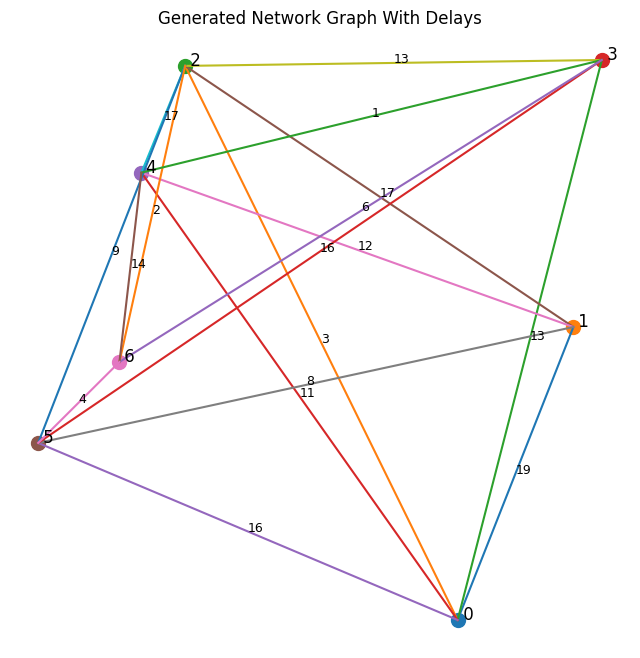

In [2]:
import random
import math
import matplotlib.pyplot as plt

# ------------------ Graph from Your Output ------------------
adj = {
    0: {1: 19, 2: 3, 3: 13, 4: 11, 5: 16},
    1: {0: 19, 2: 17, 4: 12, 5: 8},
    2: {0: 3, 1: 17, 3: 13, 4: 17, 5: 9, 6: 2},
    3: {0: 13, 2: 13, 4: 1, 5: 16, 6: 6},
    4: {0: 11, 1: 12, 2: 17, 3: 1, 6: 14},
    5: {0: 16, 1: 8, 2: 9, 3: 16, 6: 4},
    6: {2: 2, 3: 6, 4: 14, 5: 4}
}

# -------------- Generate Random Positions for Nodes ----------
positions = {
    node: (random.random(), random.random())
    for node in adj
}

# ---------------------- Draw Graph --------------------------
plt.figure(figsize=(8, 8))

# Draw edges
for u in adj:
    for v, delay in adj[u].items():
        if u < v:     # prevent drawing twice
            x1, y1 = positions[u]
            x2, y2 = positions[v]

            # draw edge line
            plt.plot([x1, x2], [y1, y2])

            # place delay text
            mx, my = (x1 + x2) / 2, (y1 + y2) / 2
            plt.text(mx, my, str(delay), fontsize=9)

# Draw nodes
for node, (x, y) in positions.items():
    plt.scatter(x, y, s=100)
    plt.text(x, y, f" {node}", fontsize=12)

plt.title("Generated Network Graph With Delays")
plt.axis("off")
plt.show()
